# 1-create-la-flatfile

This notebook goes through the CIN Census files stored in cin_received (filepath defined in 00-config) and conducts the following steps:
- Degrades date of birth into year of birth and school year
- Cleans the CIN Census files (light touch - checks for empty tags, date in improper format, etc)
- Creates a flat CSV file containing all CIN events for the LA (one row per date event - referral, CIN start, CIN end, etc. - with demographic info and a few relevant info to the event) - this means that there are a LOT of columns.

In [20]:
import glob
import os
import yaml
from wrangling.cincensus.main import main

%run "00-config.ipynb"
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Config

In [21]:
localauthority = 'Wandsworth' # Write name of LA - this must match the folder name

#### Define input and output folder

In [29]:
input_folder = os.path.join(cin_folder, localauthority)
output_folder = flatfile_folder

print("Input folder: {} \nOutput folder: {}".format(input_folder, output_folder))

Input folder: C:\Users\CGross\Desktop\cin-census-testing\cincensus\Wandsworth 
Output folder: C:\Users\CGross\Desktop\cin-census-testing\flatfiles


In [30]:
# Config file
with open('wrangling/config/cin_datamap.yaml') as FILE:
    config = yaml.load(FILE, Loader=yaml.FullLoader)

### 1. Run programme (takes a few minutes depending on quantity of data)

In [34]:
cin = main(input_folder, config)

Found 1 CIN files in folder C:\Users\CGross\Desktop\cin-census-testing\cincensus\Wandsworth
File 1 out of 1
--- Degrade file 1
5338 PersonBirthDate events were found, of which 5338 were degraded to year of birth and school year
--- Clean file 1
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 1
NbpreviousCPP active
Strip innocent de 2
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 2
NbpreviousCPP active
Strip innocent de 1
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 1
NbpreviousCPP active
Strip innocent de 1
NbpreviousCPP active
Strip innocent de 3
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 1
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 2
NbpreviousCPP active
Strip innocent de 1
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP act

NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 1
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 1
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 1
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 1
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 1
NbpreviousCPP ac

NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
NbpreviousCPP active
Strip innocent de 0
--- Create CIN flatfile
Extracting data from file 1 out of 1 from CIN Census
Done!


### 2. Quick data checks - does it look sensible?

In [25]:
# Print a few values - check they make sense

print(
    "\n{} unique Child IDs".format(len(cin.LAchildID.unique())),
    "\n{} first event".format(cin.Date.min()),
    "\n{} last event".format(cin.Date.max())
)

for col in ['Date', 'LAchildID', 'GenderCurrent', 'Ethnicity', 'Disabilities', 'PersonBirthDate']:
    print("\n{} missing values for {}".format(cin[col].isna().sum(), col))


8155 unique Child IDs 
1995-12-13 first event 
2020-03-31 last event

0 missing values for Date

0 missing values for LAchildID

0 missing values for GenderCurrent

0 missing values for Ethnicity

0 missing values for Disabilities

224 missing values for PersonBirthDate


<AxesSubplot:xlabel='Date'>

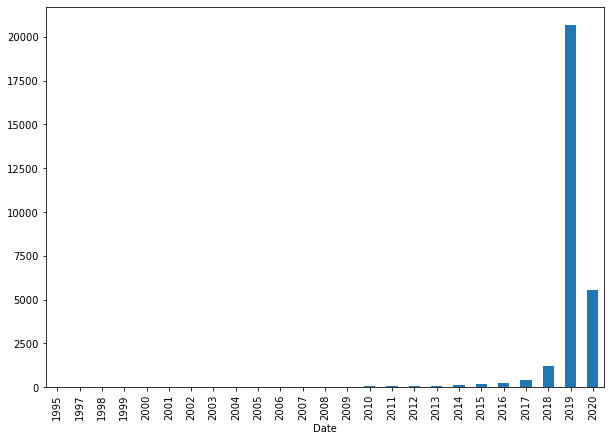

In [26]:
# Look at event distribution
cin["Date"] = cin["Date"].astype("datetime64")
cin.groupby(cin["Date"].dt.year)['Date'].count().plot(kind="bar", figsize=(10,7))

### 3. Save to csv

In [ ]:
# Add column with LA name
cin['LA'] = localauthority

# Save
cin.to_csv(os.path.join(output_folder, "{}_flatcin.csv".format(localauthority)), index=False)